# **DIVE INTO CODE COURSE**
## **Keras**
**Student Name**: Doan Anh Tien<br>
**Student ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

### **[Problem 1] Sharing and executing the official tutorial model**

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

tf.test.gpu_device_name() 
# tf.disable_eager_execution()

'/device:GPU:0'

**Data preparation**

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


**Compile model structure**

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10)])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-1.82345510e-04,  1.92981496e-01, -2.70389527e-01,
         2.96433926e-01,  5.79264045e-01, -7.56554008e-02,
        -5.09706438e-01, -2.71370709e-01, -1.08250506e-01,
         2.28643358e-01]], dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.09476967, 0.11496333, 0.07233023, 0.12749353, 0.16916859,
        0.08788035, 0.05693586, 0.07225929, 0.08506208, 0.11913712]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.431779

**Optimizer and loss function**

In [8]:
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

**Train Model**

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0900 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9767


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0740 - accuracy: 0.9774 - 568ms/epoch - 2ms/step


[0.07402639836072922, 0.977400004863739]

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.08468136e-07, 2.02269623e-09, 1.05289355e-05, 1.58691269e-04,
        1.05823371e-11, 1.61799335e-07, 3.32069238e-14, 9.99828815e-01,
        8.47054693e-08, 1.59523836e-06],
       [2.15523841e-07, 4.86744742e-04, 9.99426723e-01, 8.57062187e-05,
        1.09227873e-13, 1.97880695e-07, 3.13221591e-07, 7.33569293e-13,
        2.27216688e-07, 1.85429192e-15],
       [1.37618642e-07, 9.99378443e-01, 9.55879732e-05, 2.81305911e-05,
        1.59111041e-05, 1.40556485e-05, 6.94475193e-06, 3.18460137e-04,
        1.42019708e-04, 3.46622159e-07],
       [9.99804318e-01, 1.95808134e-08, 9.20489329e-05, 1.11028703e-06,
        1.99065312e-06, 5.83522433e-06, 6.79583245e-05, 1.38274356e-06,
        6.66074342e-08, 2.52796126e-05],
       [1.05277456e-06, 8.24767421e-10, 1.00864827e-06, 2.21095263e-07,
        9.88636792e-01, 9.06414996e-08, 7.17917601e-07, 2.45944352e-06,
        6.94901189e-07, 1.13569368e-02]], dtype=float32)>

### **[Problem 3] Learning Iris (binary classification) with Keras**

In [70]:
df = pd.read_csv("sample_data/Iris.csv")
#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [72]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

**Model structure**

In [73]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 50)                250       
                                                                 
 dense_32 (Dense)            (None, 100)               5100      
                                                                 
 dense_33 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [77]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
4/4 - 0s - loss: 9.2866e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 127ms/epoch - 32ms/step
Epoch 2/20
4/4 - 0s - loss: 8.2494e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000 - 27ms/epoch - 7ms/step
Epoch 3/20
4/4 - 0s - loss: 8.3595e-04 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000 - 27ms/epoch - 7ms/step
Epoch 4/20
4/4 - 0s - loss: 7.8134e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000 - 30ms/epoch - 8ms/step
Epoch 5/20
4/4 - 0s - loss: 7.0853e-04 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000 - 27ms/epoch - 7ms/step
Epoch 6/20
4/4 - 0s - loss: 6.1638e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000 - 24ms/epoch - 6ms/step
Epoch 7/20
4/4 - 0s - loss: 5.6191e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000 - 23ms/epoch - 6ms/step
Epoch 8/20
4/4 - 0s - loss: 5.0693e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - 27ms/epoch - 7ms/step
Epoch 

In [78]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0002676515723578632
Train accuracy: 1.0


### **[Problem 4] Learn Iris (multi-level classification) with Keras**

In [80]:
from keras.utils import np_utils

df = pd.read_csv("sample_data/Iris.csv")
#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)
# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2
# One Hot encoder
y = np_utils.to_categorical(y)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [81]:
# Standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [83]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

**Model structure**

In [86]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 50)                250       
                                                                 
 dense_35 (Dense)            (None, 100)               5100      
                                                                 
 dense_36 (Dense)            (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [89]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
5/5 - 0s - loss: 0.7230 - accuracy: 0.7292 - val_loss: 0.4560 - val_accuracy: 0.7917 - 450ms/epoch - 90ms/step
Epoch 2/20
5/5 - 0s - loss: 0.3374 - accuracy: 0.8854 - val_loss: 0.3483 - val_accuracy: 0.7917 - 27ms/epoch - 5ms/step
Epoch 3/20
5/5 - 0s - loss: 0.2021 - accuracy: 0.9479 - val_loss: 0.3225 - val_accuracy: 0.7917 - 27ms/epoch - 5ms/step
Epoch 4/20
5/5 - 0s - loss: 0.1417 - accuracy: 0.9479 - val_loss: 0.3402 - val_accuracy: 0.7917 - 31ms/epoch - 6ms/step
Epoch 5/20
5/5 - 0s - loss: 0.0927 - accuracy: 0.9583 - val_loss: 0.3874 - val_accuracy: 0.7917 - 30ms/epoch - 6ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0769 - accuracy: 0.9792 - val_loss: 0.3509 - val_accuracy: 0.8750 - 28ms/epoch - 6ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0894 - accuracy: 0.9583 - val_loss: 0.3761 - val_accuracy: 0.8750 - 29ms/epoch - 6ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0735 - accuracy: 0.9583 - val_loss: 0.4608 - val_accuracy: 0.8750 - 29ms/epoch - 6ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0624 - a

In [90]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.018914325162768364
Train accuracy: 1.0
Test loss: 0.01077828649431467
Test accuracy: 1.0


### **[Problem 5] Learning House Prices with Keras**

In [105]:
df = pd.read_csv("sample_data/train.csv")
#Condition extraction from data frame
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.log(np.array(y).reshape(-1, 1))
X = np.array(X).astype(np.float32)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [108]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_class = 1

In [109]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='linear'))

In [110]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 50)                150       
                                                                 
 dense_44 (Dense)            (None, 100)               5100      
                                                                 
 dense_45 (Dense)            (None, 3)                 303       
                                                                 
Total params: 5,553
Trainable params: 5,553
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss='mean_squared_error',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['mse'])

In [112]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
47/47 - 1s - loss: 3832.9397 - mse: 3832.9395 - val_loss: 13.0639 - val_mse: 13.0639 - 570ms/epoch - 12ms/step
Epoch 2/20
47/47 - 0s - loss: 13.6206 - mse: 13.6206 - val_loss: 6.6171 - val_mse: 6.6171 - 125ms/epoch - 3ms/step
Epoch 3/20
47/47 - 0s - loss: 5.7614 - mse: 5.7614 - val_loss: 7.6041 - val_mse: 7.6041 - 133ms/epoch - 3ms/step
Epoch 4/20
47/47 - 0s - loss: 8.2469 - mse: 8.2469 - val_loss: 3.5661 - val_mse: 3.5661 - 138ms/epoch - 3ms/step
Epoch 5/20
47/47 - 0s - loss: 2.3150 - mse: 2.3150 - val_loss: 1.5452 - val_mse: 1.5452 - 128ms/epoch - 3ms/step
Epoch 6/20
47/47 - 0s - loss: 1.4725 - mse: 1.4725 - val_loss: 1.2139 - val_mse: 1.2139 - 125ms/epoch - 3ms/step
Epoch 7/20
47/47 - 0s - loss: 1.2936 - mse: 1.2936 - val_loss: 1.1363 - val_mse: 1.1363 - 124ms/epoch - 3ms/step
Epoch 8/20
47/47 - 0s - loss: 1.2075 - mse: 1.2075 - val_loss: 1.2801 - val_mse: 1.2801 - 127ms/epoch - 3ms/step
Epoch 9/20
47/47 - 0s - loss: 1.5023 - mse: 1.5023 - val_loss: 1.5277 - val_mse: 1.52

In [113]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train mse:', train_score[1])
print('Test loss:', test_score[0])
print('Test mse:', test_score[1])

Train loss: 0.6204745769500732
Train mse: 0.6204745769500732
Test loss: 3.8631696701049805
Test mse: 3.8631696701049805


### **[Problem 6] Learning MNIST with Keras**

In [114]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [115]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (10000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


**Visualization**

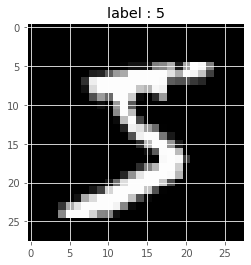

In [116]:
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

**Preprocessing**

In [117]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [118]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train = X_train / 255.0
X_test = X_test / 255.0

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(48000, 784)
(10000, 784)


In [127]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

**Model structure**

In [129]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [130]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 50)                39250     
                                                                 
 dense_50 (Dense)            (None, 100)               5100      
                                                                 
 dense_51 (Dense)            (None, 10)                1010      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['accuracy'])

In [133]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.5792 - accuracy: 0.8449 - val_loss: 0.3356 - val_accuracy: 0.9057
Epoch 2/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.2978 - accuracy: 0.9160 - val_loss: 0.2875 - val_accuracy: 0.9176
Epoch 3/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.2587 - accuracy: 0.9272 - val_loss: 0.2577 - val_accuracy: 0.9257
Epoch 4/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2353 - accuracy: 0.9335 - val_loss: 0.2425 - val_accuracy: 0.9303
Epoch 5/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.2188 - accuracy: 0.9385 - val_loss: 0.2286 - val_accuracy: 0.9325
Epoch 6/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2183 - val_accuracy: 0.9363
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1959 - accuracy: 0.9443 - val_loss: 0.2095 - val_accuracy:

In [134]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test_one_hot, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.16911157965660095
Train accuracy: 0.9524375200271606
Test loss: 0.1762416809797287
Test accuracy: 0.9490000009536743
